In [1]:
import numpy as np
import scipy as np 
import matplotlib.pyplot as plt
from pycbc import waveform,filter

In [7]:
def ComplexInnerProduct(a,b,delta_f,weights='none'):
    "computes complex inner product in the fourier domain IP = 4RE deltaf sum((a * conguagte(b))/PSD Weights)"
    if weights =='none':
        weights = np.ones(len(a))
        
    return 4*df*(np.vdot((a/weights),(b/weights)))

def InnerProduct(a,b,delta_f,weights='none'):
    "returns real component of Inner Product"
    return ComplexInnerProduct(a,b,delta_f,weights).real

def sigsq(a,weight,delta_f):
    "returns the normal of a waveform (root of inner product with itself)"
    return 4*df*np.real((np.vdot((a/weights),(a/weights))))

def sig(a,weight,delta_f):
    
    return np.sqrt(sigsq(a,weight,delta_f))

def overlap(h1,h2,psd,delta_f):
    "returns the normalised overlap of the signals "
    overlap = (1/sig(h1,psd,delta_f)/sig(h2,psd,delta_f))*InnerProduct(h1,h2,df,weights)
    return overlap

[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]


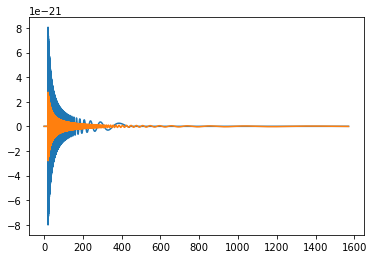

In [8]:
m1 = 5
m2 = 5
m3 = 1.4
m4 = 1.4
f_low = 20
df = 1./512

hp1,hc1 = waveform.get_fd_waveform(approximant="TaylorF2",
                         mass1=m1,
                         mass2=m2,
                         f_lower=f_low,
                         delta_f=df,phase_order=0)
hp2,hc2 = waveform.get_fd_waveform(approximant="TaylorF2",
                         mass1=m3,
                         mass2=m4,
                         f_lower=f_low,
                         delta_f=df,phase_order=0)

flen = max(len(hp1), len(hp2))
hp1.resize(flen)
hp2.resize(flen)

print(hp1)
plt.plot(hp1.sample_frequencies,hp1)
plt.plot(hp2.sample_frequencies,hp2)

In [9]:
weights = np.ones(len(hp1))
InnerP = ComplexInnerProduct(hp1,hp2,df)
RealInnerP= InnerProduct(hp1,hp2,df)
sigsqh1 = sigsq(hp1,weights,df)
sigsqh2 = sigsq(hp2,weights,df)
sigh1 = sig(hp1,weights,df)
sigh2 = sig(hp2,weights,df)
signal_overlap = overlap(hp1,hp2,weights,df)

/cvmfs/ligo-containers.opensciencegrid.org/lscsoft/conda/latest/envs/ligo-py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
print(InnerP)
print(RealInnerP)
print(sigsqh1) 
print(sigsqh2)
print(sigh1)
print(sigh2)
print(signal_overlap)

(2.1694349977540815e-43+3.746272591276743e-44j)
2.1694349977540815e-43
3.844644103306487e-39
4.669473666873177e-40
6.200519416392861e-20
2.1608964961036837e-20
0.00016191407567803581
